**NAME - Sai Bhavani pindi**

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import wbgapi as wb
import sklearn
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import warnings
from sklearn.preprocessing import StandardScaler

In [3]:
#Function creation for loading of the data
def output(flnm):
    text=pd.read_csv(flnm)
    return text

In [4]:
#Calling the function
text=output("World Indicator Repository.csv")

In [5]:
#Seeing first few rows
text.head(5)

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,29.7,30.9,31.9,33.2,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,13,13.85,15.1,15.9,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,80.9,81.6,82.3,82.6,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.69999695,96.61613464,97.69999695,97.69999695,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,97.09197235,95.58617401,97.07563019,97.06671143,..


In [6]:
text1=text.transpose()
text1.head(6)

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
Country Name,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Albania,Albania,Albania,...,World,World,World,World,World,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 04/27/2022
Country Code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,ALB,ALB,ALB,...,WLD,WLD,WLD,WLD,WLD,NaN,NaN,NaN,NaN,NaN
Series Name,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN
Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,...,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN
2017 [YR2017],29.7,13,80.9,97.69999695,97.09197235,99.5,14.89331245,78.7,60.5,91.6,...,85.16356381,88.5937661,81.39432527,97.29130406,68.51611328,NaN,NaN,NaN,NaN,NaN
2018 [YR2018],30.9,13.85,81.6,96.61613464,95.58617401,99.62602234,..,79.8,62.5,92.2,...,85.67822849,89.56614135,83.20084408,97.42136036,..,NaN,NaN,NaN,NaN,NaN


In [7]:
indctrs_GDP = ['NY.GDP.MKTP.PP.CD','SL.TLF.CACT.NE.ZS']
c_cde = ["GHA","ARG",'DNK','BGD','CHE','ESP','BRA','LUX','IND','AUS']
indctrs_CLIM=['EN.ATM.CO2E.PC','EN.ATM.PM25.MC.T1.ZS']
dataset_GDP  = wb.data.DataFrame(indctrs_GDP, c_cde, mrv=6)
dataset_CLIM = wb.data.DataFrame(indctrs_CLIM, c_cde, mrv=6)

#NY.GDP.MKTP.PP.CD: GDP, PPP in USD
#SL.TLF.CACT.NE.ZS: Labor force participation rate, total (% of total population ages 15+)
#EN.ATM.CO2E.PC:	CO2 emissions calculated in metric tons per capita
#EN.ATM.PM25.MC.T1.ZS	PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)	

In [8]:
# GDP indicators
dataset_GDP.columns = [a.replace('YR','') for a in dataset_GDP.columns]      
dataset_GDP=dataset_GDP.stack().unstack(level=1)                             
dataset_GDP.index.names = ['Cntry_Code', 'Year']                           
dataset_GDP.columns                                                     
dataset_GDP.fillna(0)
dataset_GDP.head(8)

series           NY.GDP.MKTP.PP.CD  SL.TLF.CACT.NE.ZS
Cntry_Code Year                                      
ARG        2016       8.852275e+11                NaN
           2017       1.039331e+12          58.810001
           2018       1.036428e+12          59.599998
           2019       1.033558e+12          60.290001
           2020       9.425083e+11          56.020000
AUS        2016       1.143149e+12          64.870003
           2017       1.190694e+12          65.169998
           2018       1.253361e+12          65.629997

In [9]:
#Climate indicators
dataset_CLIM.columns = [a.replace('YR','') for a in dataset_CLIM.columns]      
dataset_CLIM=dataset_CLIM.stack().unstack(level=1)                             
dataset_CLIM.index.names = ['Cntry_Code', 'Year']                           
dataset_CLIM.columns                                                     
dataset_CLIM.fillna(0)
dataset_CLIM.head(8)

series           EN.ATM.CO2E.PC  EN.ATM.PM25.MC.T1.ZS
Cntry_Code Year                                      
ARG        2013        4.359886              0.825134
           2014        4.216361              0.177212
           2015        4.314434              0.306158
           2016        4.227539              0.061206
           2017        4.089472              0.061212
           2018        3.987234                   NaN
AUS        2013       16.398646              0.000000
           2014       15.755876              0.000000

In [10]:
dataset_GDP.head(10)

series           NY.GDP.MKTP.PP.CD  SL.TLF.CACT.NE.ZS
Cntry_Code Year                                      
ARG        2016       8.852275e+11                NaN
           2017       1.039331e+12          58.810001
           2018       1.036428e+12          59.599998
           2019       1.033558e+12          60.290001
           2020       9.425083e+11          56.020000
AUS        2016       1.143149e+12          64.870003
           2017       1.190694e+12          65.169998
           2018       1.253361e+12          65.629997
           2019       1.312637e+12          65.949997
           2020       1.369885e+12          65.029999

In [11]:
#Resetting index and treatment of null values
dataset1=dataset_GDP.reset_index()
dataset2=dataset_CLIM.reset_index()
dataset3=dataset1.fillna(0)
dataset4=dataset2.fillna(0)

In [12]:
#Joining climate and gdp data
dataset_final = pd.merge(dataset3, dataset4)
dataset_final.head(12)

series,Cntry_Code,Year,NY.GDP.MKTP.PP.CD,SL.TLF.CACT.NE.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.T1.ZS
0,ARG,2016,8.852275e+11,0.000000,4.227539,0.061206
1,ARG,2017,1.039331e+12,58.810001,4.089472,0.061212
2,ARG,2018,1.036428e+12,59.599998,3.987234,0.000000
3,AUS,2016,1.143149e+12,64.870003,15.872080,0.000000
4,AUS,2017,1.190694e+12,65.169998,15.738647,0.000000
5,AUS,2018,1.253361e+12,65.629997,15.475516,0.000000
6,BGD,2016,6.080474e+11,56.090000,0.466776,99.942247
7,BGD,2017,6.644037e+11,58.330002,0.492907,99.952837
8,BGD,2018,7.338574e+11,0.000000,0.512837,0.000000
9,BRA,2016,2.939094e+12,63.480000,2.143498,1.980922


In [13]:
#Dataset normalization 
data = dataset_final.iloc[:,2:]
dataset_final.iloc[:,2:] = (data-data.min())/ (data.max() - data.min())
dataset_final.head(6)

series,Cntry_Code,Year,NY.GDP.MKTP.PP.CD,SL.TLF.CACT.NE.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.T1.ZS
0,ARG,2016,0.091399,0.000000,0.244121,0.000612
1,ARG,2017,0.108592,0.857664,0.235159,0.000612
2,ARG,2018,0.108268,0.869185,0.228522,0.000000
3,AUS,2016,0.120174,0.946041,1.000000,0.000000
4,AUS,2017,0.125479,0.950416,0.991339,0.000000
5,AUS,2018,0.132470,0.957124,0.974258,0.000000


In [14]:
#Clustering by K-means algorithm
dataset_final1 = dataset_final.drop('Cntry_Code', axis = 1)
kms = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(dataset_final1)

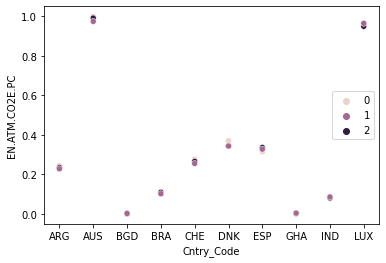

In [15]:
#Clustering the data based on CO2 emissions (metric tons per capita)
sns.scatterplot(data=dataset_final, x="Cntry_Code", y="EN.ATM.CO2E.PC", hue=kms.labels_)
plt.legend(loc='center right')
plt.show()

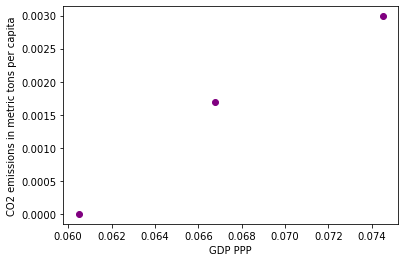

In [16]:
#Scatter plot for relationship between 
cont=dataset_final[(dataset_final['Cntry_Code']=='BGD')]
data = cont.values
x, y = data[:, 2], data[:, 4]
plt.scatter(x, y,color="purple")
plt.xlabel('GDP PPP')
plt.ylabel('CO2 emissions in metric tons per capita')
plt.show()

Covariance ->:  [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
Params ->:  [-3.63058502e+01  7.10970111e-01 -3.49663317e-02]


/Users/saibhavani/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


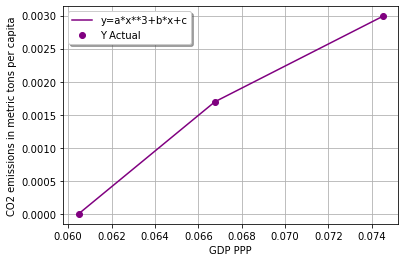

In [17]:
#Using curve_fit function for Bangladesh which has a low CO2 emissions (metric tons per capita)
x, y = data[:, 2], data[:, 4]

def f(x, a, b, c):
    return a*x**3+b*x+c
prm, co = curve_fit(f, x, y)
print("Covariance ->: ", co)
print("Params ->: ", prm)
prm, _ = curve_fit(f, x, y)
a, b, c = prm[0], prm[1], prm[2]
yfit = a*x**3+b*x+c

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**3+b*x+c",color="purple")
    plt.grid(True)
    plt.xlabel('GDP PPP')
    plt.ylabel('CO2 emissions in metric tons per capita')
    plt.plot(x, y, 'bo', label="Y Actual",color="purple")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show() 

Covariance ->:  [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
Params ->:  [-174.26176324    6.25525835    0.55071692]


/Users/saibhavani/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


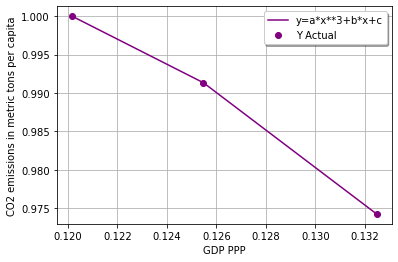

In [18]:
#Using curve_fit function for Australia which has a high CO2 emissions (metric tons per capita)
cont1=dataset_final[(dataset_final['Cntry_Code']=='AUS')]
data2 = cont1.values

x, y = data2[:, 2], data2[:, 4]

def f(x, a, b, c):
    return a*x**3+b*x+c
prm, co = curve_fit(f, x, y)
print("Covariance ->: ", co)
print("Params ->: ", prm)
prm, _ = curve_fit(f, x, y)
a, b, c = prm[0], prm[1], prm[2]
yfit = a*x**3+b*x+c

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**3+b*x+c",color="purple")
    plt.grid(True)
    plt.xlabel('GDP PPP')
    plt.ylabel('CO2 emissions in metric tons per capita')
    plt.plot(x, y, 'bo', label="Y Actual",color="purple")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show() 

/Users/saibhavani/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Covariance ->:  [[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
Params ->:  [-271.85082678   31.91435753   -3.87210173]


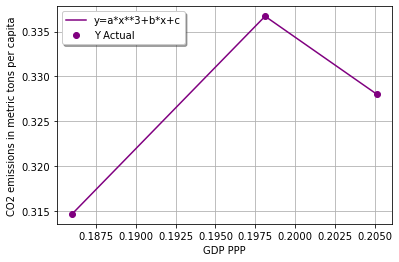

In [19]:
#Using curve_fit function for Spain which has a medium CO2 emissions (metric tons per capita)
cont4=dataset_final[(dataset_final['Cntry_Code']=='ESP')]
data4 = cont4.values

x, y = data4[:, 2], data4[:, 4]

def f(x, a, b, c):
    return a*x**3+b*x+c
prm, co = curve_fit(f, x, y)
print("Covariance ->: ", co)
print("Params ->: ", prm)
prm, _ = curve_fit(f, x, y)
a, b, c = prm[0], prm[1], prm[2]
yfit = a*x**3+b*x+c

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**3+b*x+c",color="purple")
    plt.grid(True)
    plt.xlabel('GDP PPP')
    plt.ylabel('CO2 emissions in metric tons per capita')
    plt.plot(x, y, 'bo', label="Y Actual",color="purple")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show() 

**CONCLUSION**

The country which has a high CO2 emissions in metric tons per capita has an indirect relationship between the CO2 emissions (metric tons per capita) and the purchase power parity GDP. The country which has a medium CO2 emissions in metric tons per capita has an direct relationship between the CO2 emissions (metric tons per capita) and the purchase power parity GDP at the beginning which is converted to an indirect relationship after a certain threshold of GDP, PPP. The country which has a low CO2 emissions in metric tons per capita has a direct relationship between the CO2 emissions (metric tons per capita) and the purchase power parity GDP.

In [20]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 